In [1]:
!pip install imread
!pip install resize
!pip install hog
!pip install train_test_split
!pip install SVC
!pip install classification_report
!pip install svm

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [93 lines of output]
  'pkg-config' is not recognized as an internal or external command,
  operable program or batch file.
  C:\Users\Dendi Rifqi H\anaconda3\Lib\site-packages\setuptools\__init__.py:81: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\imread
  copying imread\ijrois.py -> build\lib.win-amd6


  Using cached imread-0.7.6.tar.gz (170 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for imread
Failed to build imread

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [187 lines of output]
  C:\Users\Dendi Rifqi H\AppData\Local\Temp\pip-install-c9yvoy31\pillow_d998893f2cec42d2be96eaa3156e680e\setup.py:30: RuntimeWarning: Pillow does not yet support Python 3.12 and does not yet provide prebuilt Windows binaries. We do not recommend building from source on Windows.
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\PIL
  copying src\PIL\BdfFontFile.py -> build\lib.win-amd64-cpython-312\PIL
  copying src\PIL\BlpImagePlugin.py -> build\lib.win-amd64-cpython-312\PIL
  copying src\PIL\BmpImagePlugin.py -> build\lib.win-amd64-cpython-312\PIL
  copying src\PIL\BufrStubImagePlugin.py -> build\lib.win-amd64-cpython-312\PIL
  copying src\PIL\ContainerIO.py -> build\lib.win-amd64-cpython-312\PIL
  copying src\PIL\CurImag


  Using cached resize-0.1.0-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached Pillow-5.3.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for Pillow
Failed to build Pillow


ERROR: Could not find a version that satisfies the requirement train_test_split (from versions: none)
ERROR: No matching distribution found for train_test_split


  Using cached classification_report-1.0.0.tar.gz (24 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [10 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Dendi Rifqi H\AppData\Local\Temp\pip-install-k7hmyjkk\classification-report_09853e7aa41a44dd950b73a18a5b3d6c\setup.py", line 28, in <module>
      from src.classification_report.version import __version__
    File "C:\Users\Dendi Rifqi H\AppData\Local\Temp\pip-install-k7hmyjkk\classification-report_09853e7aa41a44dd950b73a18a5b3d6c\src\classification_report\__init__.py", line 2, in <module>
      from .report import Report
    File "C:\Users\Dendi Rifqi H\AppData\Local\Temp\pip-install-k7hmyjkk\classification-report_09853e7aa41a44dd950b73a18a5b3d6c\src\classification_report\report.py", line 9, in <module>
      import torch
  ModuleNotFoundError: No module named 'torch'
  [end of output]
  
  note: This

In [3]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fungsi untuk memuat gambar dan mengubahnya menjadi array 1D
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):  # Setiap folder adalah kategori
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):  # Pastikan hanya memproses folder
            for filename in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, filename)
                if os.path.isfile(file_path) and filename.endswith('.jpg'):  # Hanya file gambar
                    img = Image.open(file_path)
                    img = img.resize((32, 32))  # Ubah ukuran ke 32x32
                    img = img.convert('L')  # Convert ke grayscale
                    img = np.array(img).flatten()  # Ubah ke array 1D
                    images.append(img)
                    labels.append(subfolder)  # Label berasal dari nama subfolder (kategori)
    return np.array(images), np.array(labels)

# Muat data dari folder
train_folder = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Train"
X_train, y_train = load_images_from_folder(train_folder)

val_folder = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Val"
X_val, y_val = load_images_from_folder(val_folder)

test_folder = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Test"
X_test, y_test = load_images_from_folder(test_folder)

# Encode label menjadi angka
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)


In [4]:
# Buat model KNN
knn = KNeighborsClassifier(n_neighbors=2)

# Latih model menggunakan data train
knn.fit(X_train, y_train_enc)

# Validasi model menggunakan data val
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val_enc, y_val_pred)
print(f"Akurasi Validasi: {val_accuracy:.2f}")

# Prediksi pada data test
y_test_pred = knn.predict(X_test)

# Hitung akurasi test
test_accuracy = accuracy_score(y_test_enc, y_test_pred)
print(f"Akurasi Test: {test_accuracy:.2f}")

Akurasi Validasi: 0.36
Akurasi Test: 0.50


In [5]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Load Data and Assign Labels
folders = ['Kawung', 'Megamendung', 'Ceplok', 'Parang', 'Nitik', 'Tambal']
data_dir = 'C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Train'  # Replace with the path to your data
image_size = (128, 128)  # Resize images for consistency

X = []  # Features
y = []  # Labels

for label, folder in enumerate(folders):
    folder_path = os.path.join(data_dir, folder)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            file_path = os.path.join(folder_path, file_name)
            image = imread(file_path, as_gray=True)  # Load image in grayscale
            image_resized = resize(image, image_size)  # Resize image

            # Step 2: Extract HOG Features
            hog_features = hog(image_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)

            X.append(hog_features)
            y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the model using SVM
model = SVC(kernel='linear')  # Using a linear SVM for classification
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=folders))

              precision    recall  f1-score   support

      Kawung       0.94      0.42      0.58        36
 Megamendung       0.81      0.91      0.86        23
      Ceplok       0.46      0.57      0.51        23
      Parang       0.52      0.79      0.62        19
       Nitik       0.37      0.73      0.49        15
      Tambal       0.50      0.22      0.30        23

    accuracy                           0.58       139
   macro avg       0.60      0.61      0.56       139
weighted avg       0.65      0.58      0.56       139



In [8]:
from PIL import Image
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fungsi untuk memuat gambar dan mengubahnya menjadi array 1D
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):  # Setiap folder adalah kategori
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):  # Pastikan hanya memproses folder
            for filename in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, filename)
                if os.path.isfile(file_path) and filename.endswith('.jpg'):  # Hanya file .jpg
                    img = Image.open(file_path)
                    img = img.resize((32, 32))  # Ubah ukuran ke 32x32
                    img = img.convert('L')  # Convert ke grayscale
                    img = np.array(img).flatten()  # Ubah ke array 1D
                    images.append(img)
                    labels.append(subfolder)  # Label berasal dari nama subfolder (kategori)
    return np.array(images), np.array(labels)

# Muat data dari folder
train_folder = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Train/"
X_train, y_train = load_images_from_folder(train_folder)

val_folder = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Val/"
X_val, y_val = load_images_from_folder(val_folder)

test_folder = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Test/"
X_test, y_test = load_images_from_folder(test_folder)

# Encode label menjadi angka
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

In [9]:
# Import library yang dibutuhkan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Buat model KNN dengan n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model menggunakan data train
knn.fit(X_train, y_train_enc)

# Validasi model menggunakan data val
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val_enc, y_val_pred)
print(f"Akurasi Validasi: {val_accuracy:.2f}")

# Prediksi pada data test
y_test_pred = knn.predict(X_test)

# Hitung akurasi test
test_accuracy = accuracy_score(y_test_enc, y_test_pred)
print(f"Akurasi Test: {test_accuracy:.2f}")

Akurasi Validasi: 0.31
Akurasi Test: 0.40


In [10]:
from sklearn.svm import SVC

# Buat model SVM
svm_model = SVC()

# Latih model menggunakan data train
svm_model.fit(X_train, y_train_enc)

# Validasi model menggunakan data val
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val_enc, y_val_pred)
print(f"Akurasi Validasi SVM: {val_accuracy:.2f}")

# Evaluasi model pada data test
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test_enc, y_test_pred)
print(f"Akurasi Test SVM: {test_accuracy:.2f}")

Akurasi Validasi SVM: 0.43
Akurasi Test SVM: 0.20


Validation Accuracy: 0.53
Test Accuracy: 0.45
F1 Score: 0.43
Precision: 0.45
Test Log Loss: 1.49

Classification Report:
              precision    recall  f1-score   support

      Ceplok       0.43      0.30      0.35        10
      Kawung       0.27      0.30      0.29        10
 Megamendung       0.50      0.20      0.29        10
       Nitik       0.53      0.80      0.64        10
      Parang       0.42      0.50      0.45        10
      Tambal       0.55      0.60      0.57        10

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.43        60
weighted avg       0.45      0.45      0.43        60



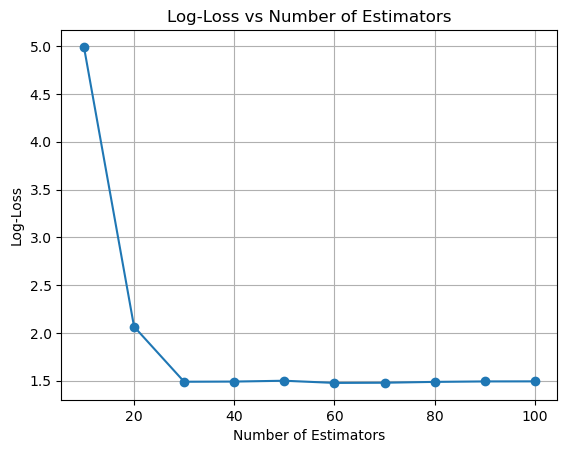

In [11]:
# Import libraries
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Function to load images from folder and flatten them
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  # Ensure image is RGB
                    img = img.resize((64, 64))  # Resize to 64x64 for consistency
                    img = np.array(img) / 255.0  # Normalize to [0, 1]
                    img = img.flatten()  # Flatten the image
                    images.append(img)
                    labels.append(subfolder)  # Use folder name as the label
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
    return np.array(images), np.array(labels)


# Load images from Data Train, Data Val, and Data Test folders
train_path = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Train/"
val_path = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Val/"
test_path = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Test/"

X_train, y_train = load_images_from_folder(train_path)
X_val, y_val = load_images_from_folder(val_path)
X_test, y_test = load_images_from_folder(test_path)

# Encode labels to numeric values
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_enc)

# Predict on validation and test sets
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate performance metrics
val_accuracy = accuracy_score(y_val_enc, y_val_pred)
test_accuracy = accuracy_score(y_test_enc, y_test_pred)
f1 = f1_score(y_test_enc, y_test_pred, average='weighted')
precision = precision_score(y_test_enc, y_test_pred, average='weighted')
test_loss = log_loss(y_test_enc, rf_model.predict_proba(X_test))

print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Test Log Loss: {test_loss:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_test_pred, target_names=label_encoder.classes_))

# Plot Loss (Log-Loss) over time
# Here, we simulate loss by calculating log-loss for every 10 estimators
losses = []
n_estimators_range = range(10, 110, 10)
for n_estimators in n_estimators_range:
    rf_temp = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_temp.fit(X_train, y_train_enc)
    temp_loss= log_loss(y_test_enc, rf_temp.predict_proba(X_test))
    losses.append(temp_loss)

# Plotting the loss graph
plt.plot(n_estimators_range, losses, marker='o')
plt.title('Log-Loss vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Log-Loss')
plt.grid(True)
plt.show()

In [41]:
from PIL import Image
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, log_loss

# Function to load images from folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  # Ensure all images are RGB
                    img = img.resize((64, 64))  # Resize to 64x64
                    img = np.array(img) / 255.0  # Normalize
                    img = img.flatten()  # Flatten image to 1D
                    images.append(img)
                    labels.append(subfolder)  # Use folder name as the label
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load images from train, val, and test folders
train_path = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Train"
val_path = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Val/"
test_path = "C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/Data Test/"

X_train, y_train = load_images_from_folder(train_path)
X_val, y_val = load_images_from_folder(val_path)
X_test, y_test = load_images_from_folder(test_path)

# Encode labels to numeric values
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_enc)

# Predict on validation and test sets
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate performance metrics
val_accuracy = accuracy_score(y_val_enc, y_val_pred)
test_accuracy = accuracy_score(y_test_enc, y_test_pred)
f1 = f1_score(y_test_enc, y_test_pred, average='weighted')
precision = precision_score(y_test_enc, y_test_pred, average='weighted')
test_loss = log_loss(y_test_enc, rf_model.predict_proba(X_test))

print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Test Log Loss: {test_loss:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_test_pred, target_names=label_encoder.classes_))

Validation Accuracy: 0.53
Test Accuracy: 0.45
F1 Score: 0.43
Precision: 0.45
Test Log Loss: 1.49

Classification Report:
              precision    recall  f1-score   support

      Ceplok       0.43      0.30      0.35        10
      Kawung       0.27      0.30      0.29        10
 Megamendung       0.50      0.20      0.29        10
       Nitik       0.53      0.80      0.64        10
      Parang       0.42      0.50      0.45        10
      Tambal       0.55      0.60      0.57        10

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.43        60
weighted avg       0.45      0.45      0.43        60



In [19]:
#C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/
!pip install tensorflow scikit-image scikit-learn opencv-python

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB 5.2 MB/s eta 0:01:14
   ---------------------------------------- 0.4/385.2 MB 5.3 MB/s eta 0:01:14
   ---------------------------------------- 0.4/385.2 MB 5.3 MB/s eta 0:01:14
   ---------------------------------------- 0.6/385.2 MB 3.3 MB/s eta 0:01:58
   ---------------------------------------- 0.7/385.2 MB 3.2 MB/s eta 0:02:01
   ---------------------------------------- 0.8/385.2 MB 3.1 MB/s eta 0:02:04
   ---------------------------------------- 1.0/385.2 MB 3.0 MB/s eta 0:02:10
   ---------------------------------------- 1.1/385.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 1.1/385.2 MB 2.9 MB/s eta 0:02:15
   ---------------------------------------- 1.2/385.2 MB 2.8 MB/s eta 0:02:

In [11]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog

# Path ke dataset
base_dir = 'C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/'
train_dir = os.path.join(base_dir, 'Data Train')
val_dir = os.path.join(base_dir, 'Data Val')
test_dir = os.path.join(base_dir, 'Data Test')

# Fungsi untuk memuat gambar dan melakukan ekstraksi fitur HOG
def load_data_and_extract_hog(folder_path):
    labels = []
    features = []
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if not os.path.isdir(category_path):
            continue
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Membaca gambar dalam grayscale
            
            # Periksa apakah gambar berhasil dimuat
            if img is None:
                print(f"Warning: Unable to load image {img_path}. Skipping...")
                continue
            
            img = cv2.resize(img, (200, 200))  # Resize gambar agar seragam
            # Ekstraksi fitur HOG
            hog_features = hog(img, pixels_per_cell=(32, 32),
                               cells_per_block=(3, 3), 
                               visualize=False)
            features.append(hog_features)
            labels.append(category)
    
    return np.array(features), np.array(labels)

# Memuat data training, validation, dan test
X_train, y_train = load_data_and_extract_hog(train_dir)
X_val, y_val = load_data_and_extract_hog(val_dir)
X_test, y_test = load_data_and_extract_hog(test_dir)

# Menggabungkan data training dan validation
X_train_full = np.concatenate((X_train, X_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

# Label encoding untuk mengubah label string menjadi angka
le = LabelEncoder()
y_train_full = le.fit_transform(y_train_full)
y_test = le.transform(y_test)

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc * 100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    return acc

# Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_acc = train_and_evaluate_model(rf_model, X_train_full, y_train_full, X_test, y_test)

# K-Nearest Neighbors
print("\nTraining K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_acc = train_and_evaluate_model(knn_model, X_train_full, y_train_full, X_test, y_test)

# Support Vector Machine
print("\nTraining Support Vector Machine...")
svm_model = SVC(kernel='linear')
svm_acc = train_and_evaluate_model(svm_model, X_train_full, y_train_full, X_test, y_test)

# Perbandingan akurasi model
print(f"\nRandom Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")


Training Random Forest...
Accuracy: 51.67%
              precision    recall  f1-score   support

      Ceplok       0.00      0.00      0.00        10
      Kawung       0.56      0.50      0.53        10
 Megamendung       0.91      1.00      0.95        10
       Nitik       0.17      0.10      0.12        10
      Parang       0.82      0.90      0.86        10
      Tambal       0.29      0.60      0.39        10

    accuracy                           0.52        60
   macro avg       0.46      0.52      0.47        60
weighted avg       0.46      0.52      0.47        60


Training K-Nearest Neighbors...
Accuracy: 56.67%
              precision    recall  f1-score   support

      Ceplok       0.32      0.60      0.41        10
      Kawung       0.83      0.50      0.62        10
 Megamendung       1.00      0.90      0.95        10
       Nitik       0.50      0.80      0.62        10
      Parang       0.75      0.60      0.67        10
      Tambal       0.00      0.00      

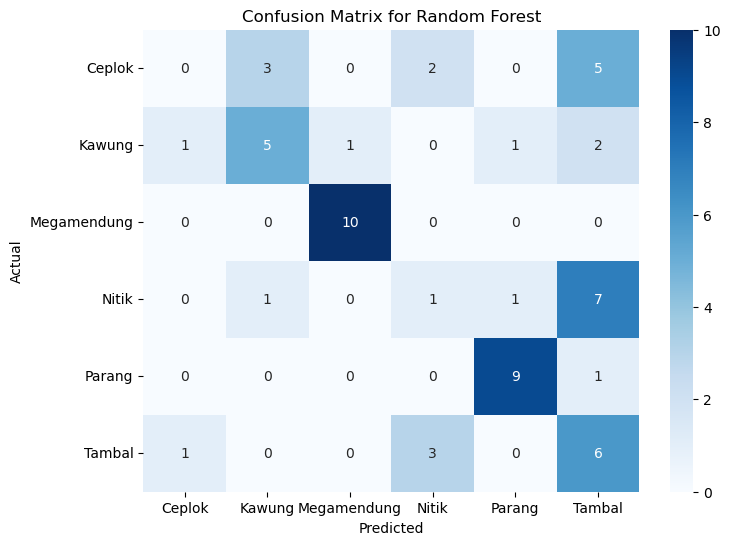

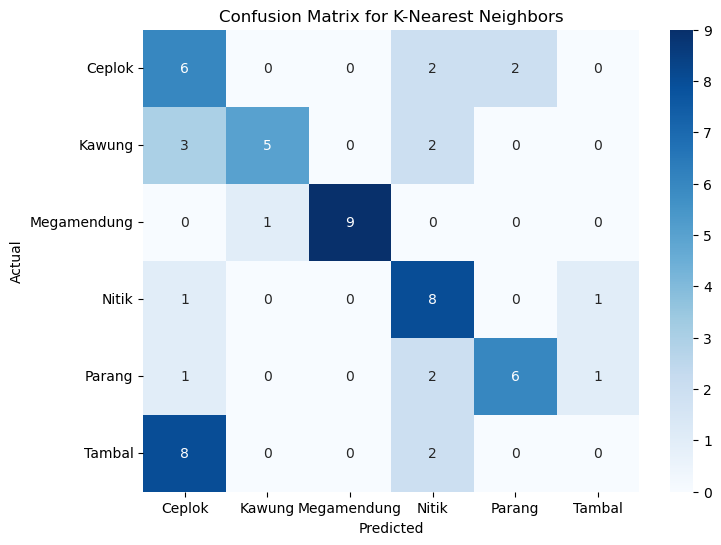

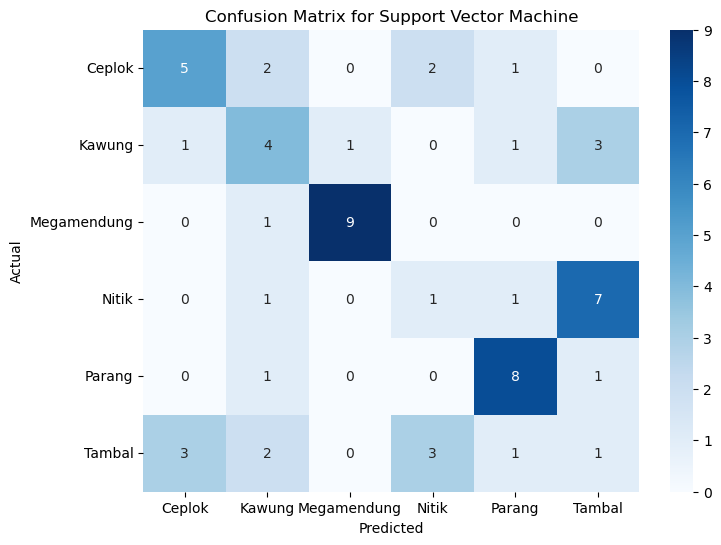

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Menampilkan confusion matrix untuk masing-masing model
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")
plot_confusion_matrix(knn_model, X_test, y_test, "K-Nearest Neighbors")
plot_confusion_matrix(svm_model, X_test, y_test, "Support Vector Machine")